# Задачи


In [ ]:
#| fold-code: true

import pandas as pd
import gurobipy as gp
from gurobipy import GRB


## Банкови заеми

Банка е в процеса на определяне на кредитната си политика за пет
различни сектора с характеристики дадени в следната таблица:

| Вид кредит      | Лихва | Дял на несъбираеми кредити |
|-----------------|------:|---------------------------:|
| Потребителски   |  0.15 |                       0.10 |
| Автомобили      |  0.13 |                       0.07 |
| Недвижими имоти |  0.12 |                       0.03 |
| Земеделие       | 0.125 |                       0.05 |
| Търговия        |  0.10 |                       0.02 |

Банката разполага с общо 12 милиона лева и при определяне на политиката
трябва да се съобрази със следните регулации:

1. Поне 40% от заемите трябва да са насочени към търговския сектор.
2. Заеми за недвижими имоти трябва да са поне половината от общата сума на потребителски кредити, кредити свързани с автомобили и недвижими имоти.
3. По силата на регулаторни изисквания дялът на несъбираемите кредити не трябва да надвишава 4% от всички кредити. Несъбираемите кредити не носят лихви.

Какъв е оптималният (най-висока печалба) план за банката?

:::{.callout-note collapse="true"}
## Математически модел

$$
\begin{align*}
x_{п} & : \text{потребителски кредити в млн. лв.} \\
x_{а} & : \text{кредити за автомобили в млн. лв.} \\
x_{н} & : \text{жилищни кредити (недвижими имоти) в млн. лв.} \\
x_{з} & : \text{земеделски кредити в млн. лв.} \\
x_{т} & : \text{търговски кредити в млн. лв.}
\end{align*}
$$

Общата лихва от кредитите е:

$$
\begin{align*}
\text{лихви} = & 0.15(1 - 0.1)x_{п} + \\
               & 0.13(1 - 0.07)x_{а} + \\
               & 0.12(1 - 0.03)x_{н} + \\
               & 0.125(1 - 0.05)x_{з} + \\
               & 0.10(1 - 0.02)x_{т}
\end{align*}
$$

Несъбираемите кредити възлизат на 

$$
\text{несъбираеми} = 0.10x_{п} + 0.07x_{а} + 0.03x_{н} + 0.05x_{з} + 0.02x_{т}
$$

:::


In [1]:
# Create a new model
m = gp.Model("mip1")

# Create variables
x_cons = m.addVar(vtype=GRB.BINARY, name="Consumer")
x_auto = m.addVar(vtype=GRB.BINARY, name="Automobile")
x_home = m.addVar(vtype=GRB.BINARY, name="Home")
x_agri = m.addVar(vtype=GRB.BINARY, name="Agriculture")
x_comm = m.addVar(vtype=GRB.BINARY, name="Commercial")

# Set objective

interest = 0.015 * (1 - 0.1 ) * x_cons + 0.13 * (1 - 0.07) * x_auto + 0.12 * (1 - 0.03) * x_home + 0.125 * (1 - 0.05) * x_agri + 0.1 * (1 - 0.02) * x_comm
defaults = 0.1 * x_cons + 0.07 * x_auto + 0.03 * x_home + 0.05 * x_agri + 0.02 * x_comm

m.setObjective(interest - defaults, GRB.MAXIMIZE)

# Constraints
# TODO


Restricted license - for non-production use only - expires 2025-11-24


## Планиране на градско строителство

Да приемем, че София е изправена пред дефицит в местния бюджет и общинският съвет обмисля как да увеличи приходите от данък сгради чрез преустройства на общински имоти. Проектът се състои от две части -- разчистване на занемарени и повредени постройки и построяване на нови жилища.

1. В момента на планиране общината притежава 300 занемарени постройки, които могат да бъдат съборени. Всяка от тях освобождава 1000 кв. метра и събарянето й струва 3 000 лв. на постройка. 15 процента от освободеното пространство е предвидено за улици, тротоари и свободни  пространства.
2. На освободените парцели общината може да построи четири вида нови жилищни сгради: еднофамилни (300 кв. метра), двуфамилни (500 кв. метра), три-фамилни (700 кв. метра) и четири-фамилни къщи (900 кв. метра). Очакваните данъчни постъпления са съответно 1 000 лв., 1 700 лв., 2 400 лв. и 2 800 лв. на година.
3. Поне 20 процента от новите постройки трябва да са еднофамилни къщи, двуфамилните домове трябва да съставляват поне 20 процента, а три и четири-фамилните домове трябва да са поне една четвърт от всички нови постройки.
4. Строителните разходи за новите домове са съответно 50 000 лв., 70 000 лв., 130 000 лв. и 160 000 лв.
5. Общината предвижда на финансира проекта чрез банков заем, който не може да надвишава 15 милиона лева.

Колко от всеки вид къщи трябва да планира да построи общината, така че да постигне възможно най-високи данъчни постъпления?


In [2]:
#| fold-code: true

with gp.Env(empty=True) as env:
    env.setParam("OutputFlag", 0)
    env.setParam("LogToConsole", 0)
    env.start()

    with gp.Model("City planning", env=env) as m:
        
        # Create variables
        single = m.addVar(vtype=GRB.CONTINUOUS, name="Single", lb=0)
        dbl = m.addVar(vtype=GRB.CONTINUOUS, name="Double", lb=0)
        trpl = m.addVar(vtype=GRB.CONTINUOUS, name="Triple", lb=0)
        quad = m.addVar(vtype=GRB.CONTINUOUS, name="Quadruple", lb=0)
        dem = m.addVar(vtype=GRB.CONTINUOUS, name="Demolished", lb=0)

        # Set objective
        m.setObjective(single + 1.7 * dbl + 2.4 * trpl + 2.8 * quad, GRB.MAXIMIZE)

        # Add constraints
        m.addConstr(300 * single + 500 * dbl + 700 * trpl + 900 * quad - 850 * dem <= 0, "Area")
        m.addConstr(dem <= 300, "Demolitions")
        m.addConstr(-0.8 * single + 0.2 * dbl + 0.2 * trpl + 0.2 * quad <= 0, "Single")
        m.addConstr(0.1 * single - 0.9 * dbl + 0.1 * trpl + 0.1 * quad <= 0, "Double")
        m.addConstr(0.25 * single + 0.25 * dbl -0.75 * trpl - 0.75 * quad <= 0, "Triple/Quadruple")
        m.addConstr(50 * single + 70 * dbl + 130 * trpl + 160 * quad + 3 * dem <= 15000, "Budget")

        # Optimize model
        m.optimize()

        # Print results
        print('Model Status:', m.status)
        print('Objective:', m.objVal)

        var_df = pd.DataFrame(columns=['Variable', 'Value', 'RC'], data=[(v.VarName, v.X, v.RC) for v in m.getVars()])
        constr_df = pd.DataFrame(columns=['Constraint', 'Shadow Price', 'Lower', 'Upper'], data=[(c.ConstrName, c.Pi, c.SARHSLow, c.SARHSUp) for c in m.getConstrs()])


Model Status: 2
Objective: 314.3115942028985


In [3]:
#| fold-code: true

var_df

,Variable,Value,RC
0,Single,36.231884,0.000000
1,Double,99.637681,0.000000
2,Triple,45.289855,0.000000
3,Quadruple,0.000000,-0.243414
4,Demolished,108.695652,0.000000


In [4]:
#| fold-code: true

constr_df

,Constraint,Shadow Price,Lower,Upper
0,Area,0.000074,-166222.222222,9.444444e+04
1,Demolitions,0.000000,108.695652,inf
2,Single,0.266127,-91.858790,3.450609e+01
3,Double,0.000000,-81.521739,inf
4,Triple/Quadruple,0.572038,-61.298077,5.545407e+01
5,Budget,0.020954,0.000000,4.140000e+04




## Производство и склад (1)

Малък шивашки цех се опитва да определи производствения си план за следващия сезон. Цехът произвежда
четири продукта: якета, шапки, ръкавици и панталони, които се произвеждат в четири отделения: рязане, уплътняване, шиене и пакетиране.


| Отделения/продукти | Якета | Шапки | Ръкавици | Панталони | Капацитет (часове) |
|--------------------|------:|------:|---------:|----------:|-------------------:|
| Рязане             |   0.3 |   0.3 |     0.25 |      0.15 |               1000 |
| Уплътняване        |  0.25 |  0.35 |      0.3 |      0.10 |               1000 |
| Шиене              |  0.45 |   0.5 |      0.4 |      0.22 |               1000 |
| Пакетиране         |  0.12 |  0.15 |      0.1 |      0.05 |               1000 |


Цехът вече има получени поръчки за четирите продукта. Договорите за производство включват неустойка за всяка недоставена единица:

| Отделения/продукти   | Якета | Шапки | Ръкавици | Панталони |
|----------------------|------:|------:|---------:|----------:|
| Поръчки (брой)       |   800 |   750 |      600 |       600 |
| Печалба (лв./брой)   |    30 |    40 |       20 |        10 |
| Неустойка (лв./брой) |    15 |    20 |       10 |         8 |


Намерете оптималния производствен план за този цех.

:::{.callout-note collapse="true"}
## Математически модел

$$
\begin{align}
x_{jackets} & : \text{брой якета} \\
x_{hats} & : \text{брой шапки} \\
x_{gloves} & : \text{брой ръкавици} \\
x_{pants} & : \text{брой панталони}
\end{align}
$$

Общата печалба от производството е равна на печалбата от продажбата на 
минус разходите за неустойки:

Печалбата от продажба е равна на количествата произведени продукти умножени по цената на единица:

$$
\text{profit (sale)} = 30x_{jackets} + 40x_{hats} + 20x_{gloves} + 10x_{pants}
$$

Разходите за неустойки се определят от разликата между поръчките и произведените продукти:

$$
\begin{align}
x_{jackets} + s_{jackets} = 800 \\
x_{hats} + s_{hats} = 750 \\
x_{gloves} + s_{gloves} = 600 \\
x_{pants} + s_{pants} = 600
\end{align}
$$

където $s_{jackets}$, $s_{hats}$, $s_{gloves}$ и $s_{pants}$ са разликите между произведени и поръчани продукти. Общата неустойка е равна на сбора от неустойките за всеки продукт:

$$
\text{penalty} = 15s_{jackets} + 20s_{hats} + 10s_{gloves} + 8s_{pants}
$$

В задачата има още и ограничения за капацитета на отделенията:

$$
0.3 x_{jackets} + 0.3 x_{hats} + 0.25 x_{gloves} + 0.15 x_{pants} \leq 1000 \\
0.25 x_{jackets} + 0.35 x_{hats} + 0.3 x_{gloves} + 0.10 x_{pants} \leq 1000 \\
0.45 x_{jackets} + 0.5 x_{hats} + 0.4 x_{gloves} + 0.22 x_{pants} \leq 1000 \\
0.12 x_{jackets} + 0.15 x_{hats} + 0.1 x_{gloves} + 0.05 x_{pants} \leq 1000
$$

Накрая има и ограничения за неотрицателност на променливите:

$$
\begin{align*}
x_{jackets}, x_{hats}, x_{gloves}, x_{pants} \geq 0 \\
s_{jackets}, s_{hats}, s_{gloves}, s_{pants} \geq 0
\end{align*}
$$

:::



In [13]:
# Create a new model
m = gp.Model("Production and Penalty")
m.Params.LogToConsole = 0

# Create variables
jackets = m.addVar(vtype=GRB.CONTINUOUS, name="Jackets")
hats = m.addVar(vtype=GRB.CONTINUOUS, name="Hats")
gloves = m.addVar(vtype=GRB.CONTINUOUS, name="Gloves")
pants = m.addVar(vtype=GRB.CONTINUOUS, name="Pants")

# Set objective

profit_sales = 30 * jackets + 40 * hats + 20 * gloves + 10 * pants

# The deficit of jackets, hats, gloves and pants

jackets_deficit = 800 - jackets
hats_deficit = 750 - hats
gloves_deficit = 600 - gloves
pants_deficit = 600 - pants

penalty = 15 * jackets_deficit + 20 * hats_deficit + 10 * gloves_deficit + 8 * pants_deficit

m.setObjective(profit_sales - penalty, GRB.MAXIMIZE)

# Constraints

# The production of jackets, hats, gloves and pants

m.addConstr(0.3 * jackets + 0.3 * hats + 0.25 * gloves + 0.15 * pants <= 1000, "Cutting")
m.addConstr(0.25 * jackets + 0.35 * hats + 0.3 * gloves + 0.1 * pants <= 1000, "Sewing")
m.addConstr(0.45 * jackets + 0.5 * hats + 0.4 * gloves + 0.22 * pants <= 1000, "Sealing")
m.addConstr(0.12 * jackets + 0.15 * hats + 0.1 * gloves + 0.05 * pants <= 1000, "Packaging")

m.optimize()

var_df = pd.DataFrame(columns=['Variable', 'Value', 'RC'], data=[(v.VarName, v.X, v.RC) for v in m.getVars()])
constr_df = pd.DataFrame(columns=['Constraint', 'Shadow Price', 'Lower', 'Upper'], data=[(c.ConstrName, c.Pi, c.SARHSLow, c.SARHSUp) for c in m.getConstrs()])



In [14]:
var_df

,Variable,Value,RC
0,Jackets,0.0,-9.0
1,Hats,2000.0,0.0
2,Gloves,0.0,-18.0
3,Pants,0.0,-8.4


In [15]:
constr_df

,Constraint,Shadow Price,Lower,Upper
0,Cutting,0.0,600.0,inf
1,Sewing,0.0,700.0,inf
2,Sealing,120.0,0.0,1428.571429
3,Packaging,0.0,300.0,inf


## Производство и склад (2)

Компания за производство на дограма има договор за доставка на дървени дограми за следващите 6 месеца. За същия период компанията очаква разходите за производство (труд и материали) да варират. Компанията може да се възползва от по-ниски производствени разходи в даден период и да произведе повече дограми от необходимото, като разходите за складиране на продуктите са 8 лв. на месец на брой. В момента на планиране фирмата няма готови дограми на склад. В края на периода за планиране компанията изисква да няма дограми на склад.

|                                   | Януари | Февруари | Март | Април | Май | Юни |
|-----------------------------------|-------:|---------:|-----:|------:|-----|-----|
| Поръчки (брой)                    |    100 |      250 |  190 |   140 | 220 | 110 |
| Производствени разходи (лв./брой) |     50 |       45 |   55 |    48 | 52  | 50  |


Формулирайте оптимизационна задача, която да намери оптималния производствен план.

:::{.callout-note collapse="true"}
## Математически модел

$$
\begin{align*}
x_{jan} & : \text{брой дограми произведени през януари} \\
x_{feb} & : \text{брой дограми произведени през февруари} \\
x_{mar} & : \text{брой дограми произведени през март} \\
x_{apr} & : \text{брой дограми произведени през април} \\
x_{may} & : \text{брой дограми произведени през май} \\
x_{jun} & : \text{брой дограми произведени през юни} \\
\end{align*}
$$

$$
\begin{align*}
y_{jan} & : \text{брой дограми на склад в края на януари} \\
y_{feb} & : \text{брой дограми на склад в края на февруари} \\
y_{mar} & : \text{брой дограми на склад в края на март} \\
y_{apr} & : \text{брой дограми на склад в края на април} \\
y_{may} & : \text{брой дограми на склад в края на май} \\
y_{jun} & : \text{брой дограми на склад в края на юни}
\end{align*}
$$

Общите производствени разходи са равни на сбора от произведените дограми умножен по цената на единица:

$$
\text{production cost} = 50x_{jan} + 45x_{feb} + 55x_{mar} + 48x_{apr} + 52x_{may} + 50x_{jun}
$$

Разходите за складиране са равни на сбора от дограмите на склад умножен по цената на единица:

$$
\text{storage cost} = 8y_{jan} + 8y_{feb} + 8y_{mar} + 8y_{apr} + 8y_{may} + 8y_{jun}
$$

За всеки период моделът трябва да гарантира, че броят произведени дограми е равен на продадените и разликата в складираните дограми.

$$
\begin{align*}
x_{jan} + (0  - y_{jan}) & = 100 \\
x_{feb} + (y_{jan} - y_{feb}) & = 250 \\
x_{mar} + (y_{feb} - y_{mar}) & = 190 \\
x_{apr} + (y_{mar} - y_{apr}) & = 140 \\
x_{may} + (y_{apr} - y_{may}) & = 220 \\
x_{jun} + (y_{may} - 0) & = 110
\end{align*}
$$

Накрая има и ограничения за неотрицателност на променливите:

$$
\begin{align*}
x_{jan}, x_{feb}, x_{mar}, x_{apr}, x_{may}, x_{jun} & \geq 0 \\
y_{jan}, y_{feb}, y_{mar}, y_{apr}, y_{may}, y_{jun} & \geq 0
\end{align*}
$$

:::


In [ ]:
# Create a new model
m = gp.Model("Production and Storage")
m.Params.LogToConsole = 0

# Create variables

x_jan = m.addVar(vtype=GRB.CONTINUOUS, name="Production in January")
x_feb = m.addVar(vtype=GRB.CONTINUOUS, name="Production in February")
x_mar = m.addVar(vtype=GRB.CONTINUOUS, name="Production in March")
x_apr = m.addVar(vtype=GRB.CONTINUOUS, name="Production in April")
x_may = m.addVar(vtype=GRB.CONTINUOUS, name="Production in May")
x_jun = m.addVar(vtype=GRB.CONTINUOUS, name="Production in June")

y_jan = m.addVar(vtype=GRB.CONTINUOUS, name="Storage in January")
y_feb = m.addVar(vtype=GRB.CONTINUOUS, name="Storage in February")
y_mar = m.addVar(vtype=GRB.CONTINUOUS, name="Storage in March")
y_apr = m.addVar(vtype=GRB.CONTINUOUS, name="Storage in April")
y_may = m.addVar(vtype=GRB.CONTINUOUS, name="Storage in May")
y_jun = m.addVar(vtype=GRB.CONTINUOUS, name="Storage in June")

production_costs = 50 * x_jan + 45 * x_feb + 55 * x_mar + 48 * x_apr + 52 * x_may + 50 * x_jun


# Balance of production and storage

m.addConstr(x_jan + (0 - y_jan)  == 100, "Balance of production and storage in February")
m.addConstr(x_feb + y_jan - y_feb == 250, "Balance of production and storage in March")
m.addConstr(x_mar + y_feb - y_mar == 190, "Balance of production and storage in April")
m.addConstr(x_apr + y_mar - y_apr == 140, "Balance of production and storage in May")
m.addConstr(x_may + y_apr - y_may == 220, "Balance of production and storage in June")
m.addConstr(x_jun + y_may  - 0 == 110, "Balance of production and storage in July")

m.optimize()

# for v in m.getVars():
#     print(f"{v.varName} = {v.x}, RC = {v.RC}")

# for c in m.getConstrs():
#     print(f"{c.constrName} = {c.slack}, Shadow price = {c.Pi}, Lower= {c.SARHSLow}, Upper = {c.SARHSUp}")

var_df = pd.DataFrame(columns=['Variable', 'Value', 'RC'], data=[(v.VarName, v.X, v.RC) for v in m.getVars()])
constr_df = pd.DataFrame(columns=['Constraint', 'Shadow Price', 'Lower', 'Upper'], data=[(c.ConstrName, c.Pi, c.SARHSLow, c.SARHSUp) for c in m.getConstrs()])



## Производство и персонал (1)

Компания за производство на дограма има договор за доставка на дървени дограми за следващата година.
Компанията разполага с 10 опитни сътрудника, назначени на трудови договори. Всеки от тях произвежда по 12 дограми на тримесечие. Компанията може да отговори на флуктуациите в търсенето на своите продукти, като назначава и уволнява сътрудници на срочни договори. Временно заетите произвеждат по 3 дограми на месец. Разходите за назначаване/уволняване на временни сътрудници са съответно 200 лв. и 400 лв. за тримесечие. Компанията може да складира непродадени единици на цена 50 лв. на месец на единица.

|                | Януари-Март | Април-Юни | Юли-Септември | Октомври-Декември |
|----------------|------------:|----------:|--------------:|------------------:|
| Поръчки (брой) |         520 |       720 |           520 |               620 |


Формулирайте оптимизационна задача, която да намери оптималния план за назначаване/уволняване на временно заетите работници.



## Производство и персонал (2)

Фирма, специализирана в производство на зимни палта се опитва да посрещне
търсенето на нейните стоки с възможно най-малки разходи. Всеки работник, нает в началото на
сезона работи през целия сезон, произвежда 80 палта и получава 6000 лв. заплата.
В началото на годината фирмата разполага с 30 работника.

Търсенето на палта има силни сезонни колебания и фирмата има три опции,
за да отговори на тези  вариации:

- работниците могат да работят и по-продължително, но допълнителният труд се
заплаща 50% по-скъпо и работниците могат да работят не повече от 20% повече
от нормалното работно време.
- Произведени в предишния период палта могат да се складират на цена от 12 лв.
на сезон за всяко палто.
- Фирмата може да назначава и освобождава служители. За назначаване на един
нов служител цената е 500 лв. За освобождаване на служител разходите възлизат
на 420 лв.
- Фирмата няма начални запаси от готови палта.


Маркетинговият отдел на предприятието оценява, че през следващите четири сезона
търсенето ще възлиза на съответно 5000, 2000, 500 и 1500 палта.

Изгответе математически модел с който да намерите оптималния план
(в смисъл на най-ниски разходи) за тази фирма.

:::{.callout-note collapse="true"}
## Математически модел

\begin{align*}
& w_i: \text{работници в сезон } i\\
& x_i: \text{произведени палта в сезон } i\\
& o_i: \text{произведени с извънреден труд палта  в сезон } i\\
& h_i: \text{брой наети сътрудници в сезон } i\\
& f_i: \text{брой освободени сътрудници в сезон } i\\
& s_i: \text{брой палта на склад сезон } i\\
& d_i: \text{брой палта продадени през сезон } i\\
\end{align*}

\begin{align*}
& \min 6000 \sum_{i = 1}^{4} w_i + 500 \sum_{i = 1}^{4} h_i + 420 \sum_{i = 1}^{4} f_i + 12 \sum_{i = 1}^{4} s_i +
1.5\frac{6000}{80} \sum_{i = 1}^{4} o_i\\
& w_0 = 30\\
& w_i = w_{i - 1} + h_i - f_i\\
& x_i = 80 w_i + o_i \\
& s_0 = 0 \\
& s_i = s_{i - 1} + x_i - d_i \\
& o_i \leq 0.2 \cdot 80 w_i
\end{align*}
:::

In [ ]:
var_df

In [ ]:
constr_df

## Оптимизация на производство (рафинерия)

Рафинерия произвежда три вида безоловен бензин, които се различават по октановото си число (ON): обикновен ($ON \geq 87$), премиум ($ON \geq 89$) и супер ($ON \geq 92$). Преработката на суровия петрол обхваща три компонента.

1. В първият компонент суровият петрол се дестилира до петролна суровина (feedstock) с октаново число ON = 82. За производството на един барел суровина са нужни 5 барела суров петрол. Капацитетът на дестилационните съоръжения е 1 500 хиляди барела на ден.
2. Част от петролната суровина се обработва допълнително в термичен крекер, който произвежда бензин с ON = 98. От един барел суровина крекерът произвежда половин барел бензин. Капацитетът на крекера е ограничен до 200 000 барела петролна суровина на ден.
3. Последният елемент в рафинерията е смесител, който комбинира бензин от крекера и петролна суровина от дестилацията. Октановото число на смеси е приблизително равно на претегленото средно на октановите числа на компонентите им. Пример: от 1 барел с ON=90 и 2 барела с ON=100 ще се получат три барела смес с октаново число $(1\times 90 + 2 \times 100) / 3 \approx 96.6$
4. Търсенето на трите вида бензин е ограничено до съответно 50, 30, и 40 хиляди барела на ден.
5. Рафинерията оценява печалбата от барел бензин на съответно 6, 7 и 8 долара за трите вида бензин, които продава.

Съставете математически модел, на базата на който да препоръчате оптимален (най-висока печалба) производствен план на рафинерията.

Виж @fig-refinery за производствената схема на рафинерията.


```{mermaid}
%%| label: fig-refinery
%%| fig-cap: Производствена схема на рафинерията

flowchart LR
    A[Дестилация 5:1] -->|ON=82| B[Крекер 2:1]
    A --> |ON=82| C
    B -->|ON=98| C[Смесител 1:1]
    C --> D(ON=87)
    C --> E(ON=89)
    C --> F(ON=92)
```

In [10]:
import gurobipy as gp
from gurobipy import GRB

# Create a new model
m = gp.Model("Oil Refinery")
m.Params.LogToConsole = 0

# Create variables

s1_dist = m.addVar(vtype=GRB.CONTINUOUS, name="S1 Distillation")
s2_dist = m.addVar(vtype=GRB.CONTINUOUS, name="S2 Distillation")
s3_dist = m.addVar(vtype=GRB.CONTINUOUS, name="S3 Distillation")

s1_crack = m.addVar(vtype=GRB.CONTINUOUS, name="S1 Cracking")
s2_crack = m.addVar(vtype=GRB.CONTINUOUS, name="S2 Cracking")
s3_crack = m.addVar(vtype=GRB.CONTINUOUS, name="S3 Cracking")


# Set objective
m.setObjective(6.7 * (s1_dist + s1_crack) + 7.2 * (s2_dist + s2_crack) + 8.1 * (s3_dist + s3_crack), GRB.MAXIMIZE)

# Constraints

## Octane numbers of products

m.addConstr(82 * s1_dist + 98 * s1_crack >= 87 * (s1_dist + s1_crack), "ON of gasoline 1")
m.addConstr(82 * s2_dist + 98 * s2_crack >= 89 * (s2_dist + s2_crack), "ON of gasoline 2")
m.addConstr(82 * s3_dist + 98 * s3_crack >= 93 * (s3_dist + s3_crack), "ON of gasoline 3")

## Input capacities

m.addConstr(2 * (s1_crack + s2_crack + s3_crack) <= 200e3, "Cracker")
m.addConstr(5 * (s1_dist + s2_dist + s3_dist) + 5 * 2 * (s1_crack + s2_crack + s3_crack) <= 1.5e6, "Distillation")

# Demand constraints

m.addConstr(s1_dist + s1_crack <= 50e3, "Demand of gasoline 1")
m.addConstr(s2_dist + s2_crack <= 30e3, "Demand of gasoline 2")
m.addConstr(s3_dist + s3_crack <= 40e3, "Demand of gasoline 3")

m.optimize()

vars_df = pd.DataFrame(columns=['Variable', 'Value', 'RC'], data=[(v.VarName, v.X, v.RC) for v in m.getVars()])
constr_df = pd.DataFrame(columns=['Constraint', 'Shadow Price', 'Lower', 'Upper'], data=[(c.ConstrName, c.Pi, c.SARHSLow, c.SARHSUp) for c in m.getConstrs()])

print('Model Status:', m.status)
print('Objective:', m.objVal)

Model Status: 2
Objective: 875000.0


In [8]:
vars_df

,Variable,Value,RC
0,S1 Distillation,34375.0,0.0
1,S2 Distillation,16875.0,0.0
2,S3 Distillation,12500.0,0.0
3,S1 Cracking,15625.0,0.0
4,S2 Cracking,13125.0,0.0
5,S3 Cracking,27500.0,0.0


In [9]:
constr_df

,Constraint,Shadow Price,Lower,Upper
0,ON of gasoline 1,-0.0,-250000.0,5.500000e+05
1,ON of gasoline 2,-0.0,-210000.0,2.700000e+05
2,ON of gasoline 3,-0.0,-440000.0,2.000000e+05
3,Cracker,0.0,112500.0,inf
4,Distillation,0.0,881250.0,inf
5,Demand of gasoline 1,6.7,0.0,1.442857e+05
6,Demand of gasoline 2,7.2,0.0,1.160870e+05
7,Demand of gasoline 3,8.1,0.0,1.036364e+05


## Планиране на работни смени

Да си представим, че община София разработва разписанието на нова автобусна линия. Изследване на търсенето по маршрута на
тази линия показва колко автобуси трябва да обслужват линията в 6 часови диапазона (@fig-bus-schedule-graph).
Всеки автобус може да започне смяна в 00:01, 04:01, 08:01, 12:01, 16:01 или в 20:01 обслужва линията в продължение на 8 часа.
Намерете най-малкия брой автобуси, които са нужни за обслужването на линията.

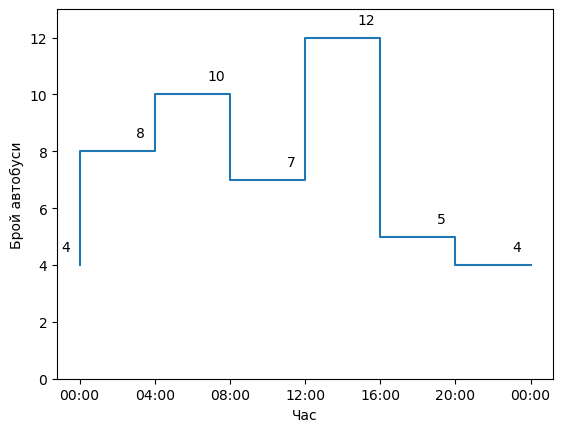

In [6]:
#| fold-code: true
#| label: fig-bus-schedule-graph
#| fig-cap: "График на натоварване на автобусите през деня"

import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame
schedule_df = pd.DataFrame({
  'shift': [1, 2, 3, 4, 5, 6, 7],
  'demand': [4, 8, 10, 7, 12, 5, 4]
})

# Plot
plt.step(schedule_df['shift'], schedule_df['demand'])
plt.ylim(0, 13)
plt.xticks(ticks = schedule_df['shift'], labels = ["00:00", "04:00", "08:00", "12:00", "16:00", "20:00", "00:00"])
plt.xlabel('Час')
plt.ylabel('Брой автобуси')
for i, txt in enumerate(schedule_df['demand']):
    plt.annotate(txt, (schedule_df['shift'][i], schedule_df['demand'][i]), textcoords="offset points", xytext=(-10,10), ha='center')
plt.show()

## Радиотерапия


|       |                      Лъч 4 |                      Лъч 5 |                      Лъч 6 |
|-------|---------------------------:|---------------------------:|---------------------------:|
| Лъч 1 |       [1/1]{color="green"} |   [2/1]{color="firebrick"} |       [2/1]{color="green"} |
| Лъч 2 |   [1/2]{color="firebrick"} |        [2/2]{color="blue"} | [2.5/2]{color="firebrick"} |
| Лъч 3 | [1.5/1]{color="firebrick"} | [1.5/1]{color="firebrick"} |     [2.5/1]{color="green"} |

Целта е здравите тъкани (в зелено) да получат възможно най-малка доза радиация, докато в същото време болните тъкани трябва да
получат поне 7Gy (Грей), за да бъдат унищожени. Тъканта на гръбначния мозък (в синьо) е особено чувствителна и не трябва да
бъде изложена на радиация повече от 5Gy.

:::{.callout-note collapse="true"}
## Математически модел

$$
\begin{align*}
& \min (x_1 + x_4) + (2x_2 + 2x_5) + (2x_1 + x_6) + (2.5x_3 + x_6) = \\ 3x_1 + 2x_2 + 2.5x_3 + 2x_6 \\
& x_2 + 2x_4 \geq 7\\
& 1.5x_3 + x_4 \geq 7 \\
& 2x_1 + x_5 \geq 7 \\
& 1.5x_3 + x_5 \geq 7 \\
& 2.5x_2 + 2x_6 \geq 7 \\
& 2x_2 + 2x_5 \leq 5
\end{align*}
$$

:::
